# Binary Classification Project – F1 Score Evaluation

## Objective
The goal of this project is to train a machine learning classifier to predict a binary class (0 or 1) using a given dataset.

### Task Requirements:
- Train a classifier to predict Class (0,1)
- Use F1-score as the evaluation metric
- Use any programming language and libraries
- Share the code and explain the results


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Load the Dataset
The dataset is provided as an Excel file. We load it using pandas and inspect its structure.


In [107]:
df = pd.read_excel("data.xlsx")
df.head()

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
0,1,0,1,0,2,4,3,4,4,2,...,4,4,4,4,4.0,4.0,4.0,1.0,3.20,1
1,2,0,0,0,2,4,4,4,4,3,...,4,3,4,4,3.0,4.0,3.0,0.0,3.82,1
2,3,0,1,0,1,3,2,3,4,3,...,3,4,4,3,4.0,4.0,2.0,1.0,3.75,1
3,4,1,1,1,3,4,4,4,4,4,...,4,4,4,4,3.0,4.0,4.0,1.0,3.70,1
4,5,0,0,0,2,4,3,3,4,3,...,4,3,3,3,4.0,4.0,2.0,1.0,3.82,0


## Dataset Overview
We examine the size, columns, and basic information about the dataset.


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           260 non-null    int64  
 1   Gender       260 non-null    int64  
 2   Nationality  260 non-null    int64  
 3   Major        260 non-null    int64  
 4   Level        260 non-null    int64  
 5   IE1          260 non-null    int64  
 6   SMSK3        260 non-null    int64  
 7   RAS1         260 non-null    int64  
 8   RAS2         260 non-null    int64  
 9   SMSK1        260 non-null    int64  
 10  SMSK4        260 non-null    int64  
 11  IE2          260 non-null    int64  
 12  TL1          260 non-null    int64  
 13  RAS3         260 non-null    int64  
 14  IE3          260 non-null    int64  
 15  RAS4         260 non-null    int64  
 16  RAS5         260 non-null    int64  
 17  IE4          260 non-null    int64  
 18  SMSK2        260 non-null    int64  
 19  TL2     

In [109]:
df.shape

(260, 39)

In [110]:
df.describe()

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,241.000000,246.000000,210.000000,258.000000,260.000000,260.000000
mean,130.500000,0.400000,0.303846,0.453846,1.973077,3.523077,3.226923,3.476923,3.542308,3.073077,...,3.557692,3.426923,3.376923,3.265385,3.344398,3.394309,2.566667,0.848837,3.510577,0.488462
std,75.199734,0.490843,0.460804,0.498825,0.442926,0.592298,0.744637,0.654245,0.629195,0.851099,...,0.652097,0.728916,0.768747,0.807036,0.852484,0.794758,1.144085,0.358904,0.452017,0.500831
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,65.750000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.430000,0.000000
50%,130.500000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.510000,0.000000
75%,195.250000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,3.710000,1.000000
max,260.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000


## Target Variable Distribution
The target variable is `Class`.  
We check whether the dataset is balanced or imbalanced.


In [111]:
df["Class"].value_counts()


Class
0    133
1    127
Name: count, dtype: int64

In [112]:
df["Class"].value_counts(normalize=True)

Class
0    0.511538
1    0.488462
Name: proportion, dtype: float64

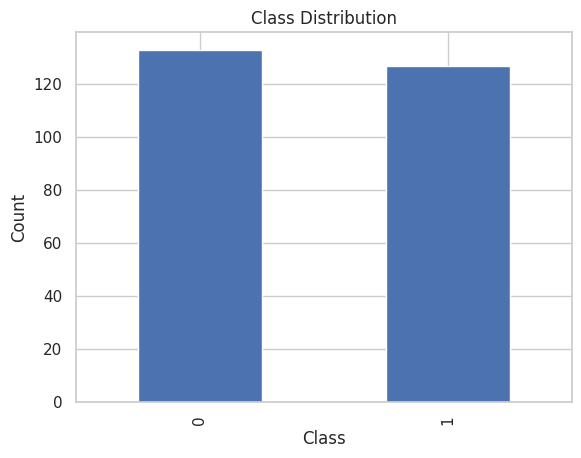

In [113]:
df["Class"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()  

the target variable is ``Class`` --> we have a balanced dataset class (0,1) with approximately the same number of samples.

## Data Preparation
- Remove the ID column (not useful for prediction)
- Separate features (X) and target (y)


In [114]:
X = df.drop(columns=["Class", "ID"])
y = df["Class"]

X.head()


,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,SMSK4,...,IM2,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score
0,0,1,0,2,4,3,4,4,2,3,...,4,4,4,4,4,4.0,4.0,4.0,1.0,3.20
1,0,0,0,2,4,4,4,4,3,3,...,4,4,3,4,4,3.0,4.0,3.0,0.0,3.82
2,0,1,0,1,3,2,3,4,3,3,...,4,3,4,4,3,4.0,4.0,2.0,1.0,3.75
3,1,1,1,3,4,4,4,4,4,3,...,4,4,4,4,4,3.0,4.0,4.0,1.0,3.70
4,0,0,0,2,4,3,3,4,3,3,...,3,4,3,3,3,4.0,4.0,2.0,1.0,3.82


## Data Cleaning

Before training the models, we perform data cleaning to ensure data quality
and reliability of the results. This includes:
- Checking missing values
- Removing duplicates
- Handling data types
- Verifying invalid values


In [115]:
df.isnull().sum()

ID              0
Gender          0
Nationality     0
Major           0
Level           0
IE1             0
SMSK3           0
RAS1            0
RAS2            0
SMSK1           0
SMSK4           0
IE2             0
TL1             0
RAS3            0
IE3             0
RAS4            0
RAS5            0
IE4             0
SMSK2           0
TL2             0
TL3             0
PSD1            0
PSD2            0
PSD3            0
IE5             0
PSD4            0
PSD5            0
IM1             0
IM2             0
IM3             0
IM4             0
IM5             0
IM6             0
W1             19
W2             14
W3             50
Employed        2
Score           0
Class           0
dtype: int64

In [116]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

W1          19
W2          14
W3          50
Employed     2
dtype: int64

we should handle missing values appropriately,
either by imputate the missing data with mode for categorial column, the negligeable percentage of missing (employed) 
with the median for the high and moderate missing percentage and numeric cols (w1/w2/w3).

In [117]:
df["Employed"] = df["Employed"].fillna(df["Employed"].mode()[0])
for col in ["W1", "W2", "W3"]:
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [118]:
df.duplicated().sum()

0

No duplicates were found in the dataset.

In [119]:
df.dtypes

ID               int64
Gender           int64
Nationality      int64
Major            int64
Level            int64
IE1              int64
SMSK3            int64
RAS1             int64
RAS2             int64
SMSK1            int64
SMSK4            int64
IE2              int64
TL1              int64
RAS3             int64
IE3              int64
RAS4             int64
RAS5             int64
IE4              int64
SMSK2            int64
TL2              int64
TL3              int64
PSD1             int64
PSD2             int64
PSD3             int64
IE5              int64
PSD4             int64
PSD5             int64
IM1              int64
IM2              int64
IM3              int64
IM4              int64
IM5              int64
IM6              int64
W1             float64
W2             float64
W3             float64
Employed       float64
Score          float64
Class            int64
dtype: object

In [120]:
df.Employed = df.Employed.astype(int)
df.dtypes

ID               int64
Gender           int64
Nationality      int64
Major            int64
Level            int64
IE1              int64
SMSK3            int64
RAS1             int64
RAS2             int64
SMSK1            int64
SMSK4            int64
IE2              int64
TL1              int64
RAS3             int64
IE3              int64
RAS4             int64
RAS5             int64
IE4              int64
SMSK2            int64
TL2              int64
TL3              int64
PSD1             int64
PSD2             int64
PSD3             int64
IE5              int64
PSD4             int64
PSD5             int64
IM1              int64
IM2              int64
IM3              int64
IM4              int64
IM5              int64
IM6              int64
W1             float64
W2             float64
W3             float64
Employed         int64
Score          float64
Class            int64
dtype: object

In [121]:
df.Employed.unique()

array([1, 0])

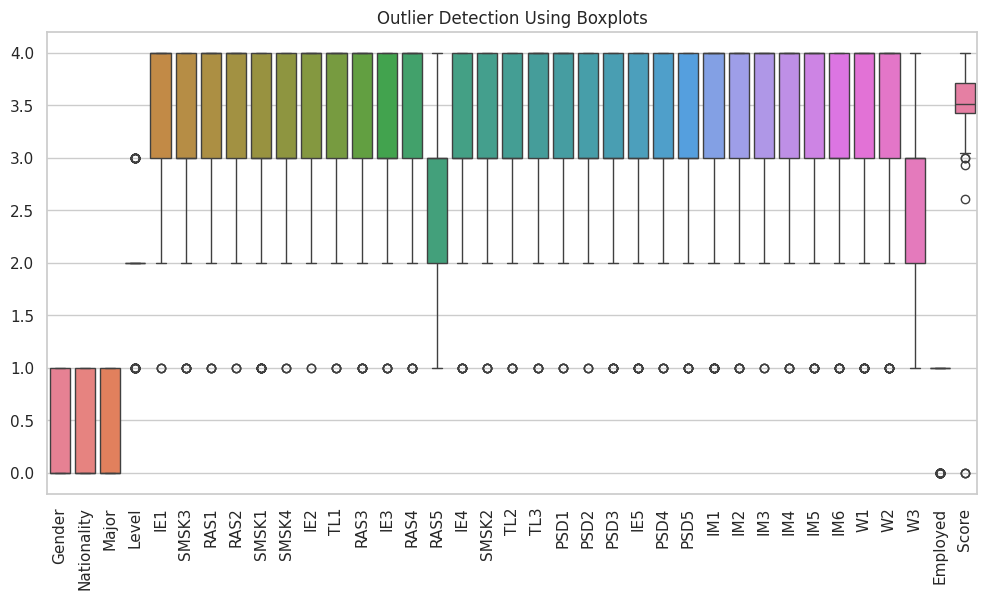

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Class", "ID"]))
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplots")
plt.show()


# Feature Scaling
For this dataset, feature scaling is not strictly necessary 
But it is still acceptable (and often recommended) depending on the model
--> we don't have an important scale difference between the features.

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(columns=["Class", "ID"])
y = df["Class"]
X_scaled = scaler.fit_transform(X)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((208, 37), (52, 37))

First model we will use is **Logistic Regression**.

# Model 1 - Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

log_model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

## Logistic Regression Evaluation
We evaluate the model using:
- F1-score
- Confusion Matrix


In [126]:
y_pred_log = log_model.predict(X_test)

f1_log = f1_score(y_test, y_pred_log)
print("Logistic Regression F1-score:", f1_log)

print(classification_report(y_test, y_pred_log))


Logistic Regression F1-score: 0.88
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.88      0.88      0.88        25

    accuracy                           0.88        52
   macro avg       0.88      0.88      0.88        52
weighted avg       0.88      0.88      0.88        52



**Confusion Matrix – Logistic Regression**


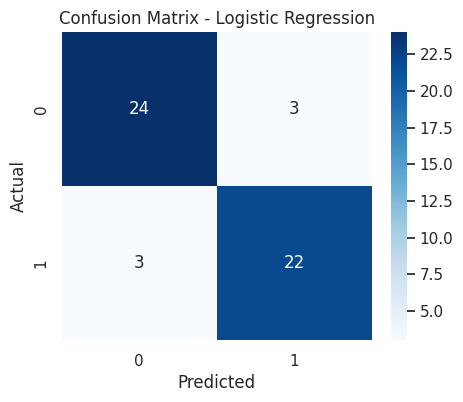

In [127]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Model 2: Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

**Random Forest Evaluation**


In [129]:
y_pred_rf = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest F1-score:", f1_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest F1-score: 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.96      0.96      0.96        25

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



## Model 3: Support Vector Machine (SVM)

In [130]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    class_weight="balanced",
    random_state=42
)

svm_model.fit(X_train, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


**SVM Evaluation**

In [131]:
y_pred_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm)
print("SVM F1-score:", f1_svm)

print(classification_report(y_test, y_pred_svm))


SVM F1-score: 0.9019607843137255
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.88      0.92      0.90        25

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



## Model 4: XGBoost

In [132]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [133]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

**XGBoost Evaluation**


In [134]:
y_pred_xgb = xgb_model.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb)
print("XGBoost F1-score:", f1_xgb)
print(classification_report(y_test, y_pred_xgb))


XGBoost F1-score: 0.9795918367346939
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.96      0.98        25

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52



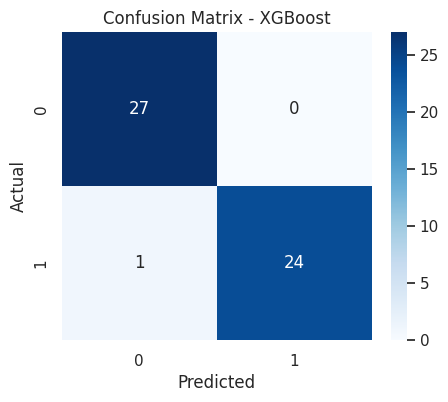

In [135]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


## Model Performance Comparison

The following table compares the F1-scores of all trained models.


In [136]:
comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "SVM",
        "XGBoost"
    ],
    "F1-score": [
        f1_log,
        f1_rf,
        f1_svm,
        f1_xgb
    ]
})

comparison_df

,Model,F1-score
0,Logistic Regression,0.880000
1,Random Forest,0.960000
2,SVM,0.901961
3,XGBoost,0.979592


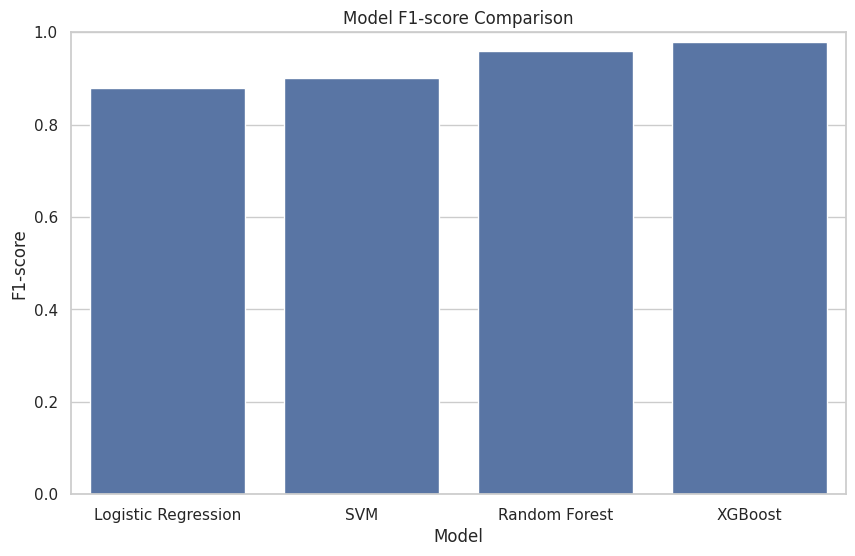

In [137]:
comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "SVM",
        "Random Forest",
        "XGBoost"
    ],
    "F1-score": [
        f1_log,
        f1_svm,
        f1_rf,
        f1_xgb
    ]
})
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1-score", data=comparison_df)
plt.ylim(0, 1)
plt.title("Model F1-score Comparison")
plt.show()

## Conclusion
We compared several classification models using F1-score.
While ensemble models achieved strong results, further validation is required to ensure generalization, especially for complex models like XGBoost and Random Forest.
